# Open3D

In [1]:
import numpy as np
import open3d as o3d

pc_npz = np.load("/root/ShapeBind/ImageBind-LoRA/.assets/plane.npz")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pc_np = pc_npz['pointcloud']
print('Shape of the Point Cloud:', pc_np.shape)
# Create PointCloud class
pc = o3d.geometry.PointCloud()
pc.points = o3d.utility.Vector3dVector(pc_np)

Shape of the Point Cloud: (16384, 3)


In [3]:
# visualization
o3d.visualization.draw_geometries([pc])

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


# Matplotlib

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_point_clouds_3d_v2(pcl_lst, title_lst=None, vis_axis_order=[0, 2, 1], fig_title=None):
    if title_lst is None:
        title_lst = [""] * len(pcl_lst)
    
    fig = plt.figure(figsize=(3 * len(pcl_lst), 3))
    if fig_title is not None:
        plt.title(fig_title)
        
    for idx, (pts, title) in enumerate(zip(pcl_lst, title_lst)):
        ax1 = fig.add_subplot(1, len(pcl_lst), 1 + idx, projection='3d')
        ax1.set_title(title)       
        ax1.scatter(pts[:, vis_axis_order[0]], pts[:, vis_axis_order[1]], pts[:, vis_axis_order[2]], s=2)
    fig.canvas.draw()

    # grab the pixel buffer and dump it into a numpy array
    res = np.array(fig.canvas.renderer._renderer)
    res = np.transpose(res, (2, 0, 1))

    plt.close()
    res = Image.fromarray(res[:3].transpose(1,2,0))
    return res


Shape of the Point Cloud: (16384, 3)


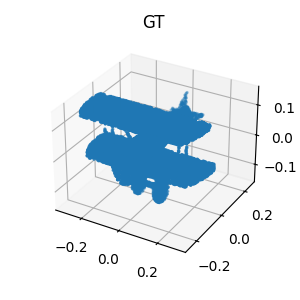

In [8]:
import numpy as np

pc_npz = np.load("/root/ShapeBind/ImageBind-LoRA/.assets/plane.npz")
pc_np = pc_npz['pointcloud']
print('Shape of the Point Cloud:', pc_np.shape)

visualize_point_clouds_3d_v2([pc_np], title_lst= ['GT'], vis_axis_order=[0, 2, 1])



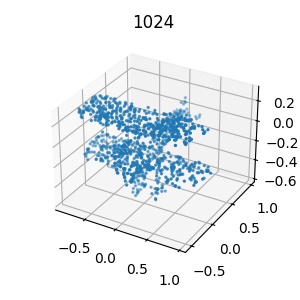

In [11]:
def pc_norm(pc):
    """ pc: NxC, return NxC """
    centroid = np.mean(pc, axis=0)
    pc = pc - centroid
    m = np.max(np.sqrt(np.sum(pc**2, axis=1)))
    pc = pc / m
    return pc

def random_sample(pc, num, permutation):
    np.random.shuffle(permutation)
    pc = pc[permutation[:num]]
    return pc

sample_points_num: int = 1024
random_seed: int = 42

# Random seed 고정
np.random.seed(random_seed)

# ShapeTalk default point number 16384
npoints = 16384
permutation = np.arange(npoints)



# Sample & Normalize
shape = random_sample(pc_np, sample_points_num, permutation)
shape = pc_norm(shape)

visualize_point_clouds_3d_v2([shape], title_lst= ['1024'], vis_axis_order=[0, 2, 1])

# Plotly

In [9]:
#!pip install plotly --quiet
import plotly.express as px

def plot_3d_shape(shape):
    print("Number of data points: ", shape.shape[0])
    x = shape[:, 0]
    y = shape[:, 1]
    z = shape[:, 2]
    fig = px.scatter_3d(x=-z, y=x, z=y, opacity=0.3)
    fig.show()


import numpy as np

pc_npz = np.load("/root/ShapeBind/ImageBind-LoRA/.assets/plane.npz")
pc_np = pc_npz['pointcloud']
print('Shape of the Point Cloud:', pc_np.shape)


def pc_norm(pc):
    """ pc: NxC, return NxC """
    centroid = np.mean(pc, axis=0)
    pc = pc - centroid
    m = np.max(np.sqrt(np.sum(pc**2, axis=1)))
    pc = pc / m
    return pc

def random_sample(pc, num, permutation):
    np.random.shuffle(permutation)
    pc = pc[permutation[:num]]
    return pc

sample_points_num: int = 1024
random_seed: int = 42

# Random seed 고정
np.random.seed(random_seed)

# ShapeTalk default point number 16384
npoints = 16384
permutation = np.arange(npoints)



# Sample & Normalize
shape = random_sample(pc_np, sample_points_num, permutation)
shape = pc_norm(shape)

plot_3d_shape(shape)

Shape of the Point Cloud: (16384, 3)
Number of data points:  1024
